In [1]:
# 安裝相關套件
# install dependencies: 
!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

1.6.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# 安裝Detectron2
# install detectron2: (Colab has CUDA 10.1 + torch 1.6)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
assert torch.__version__.startswith("1.6")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html
     |████████████████████████████████| 6.6MB 614kB/s 
     |████████████████████████████████| 2.2MB 8.6MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20201030-cp36-none-any.whl size=44294 sha256=c3947a2498cb17cec0ed21c0030b9bf33ed45315d8d04dc3bbd09fcbc1b7fd1a
  Stored in directory: /root/.cache/pip/wheels/7f/7a/c8/521a7c1d1974bf1c536fed7cb258e3be173730d71065407bab
Successfully built fvcore
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


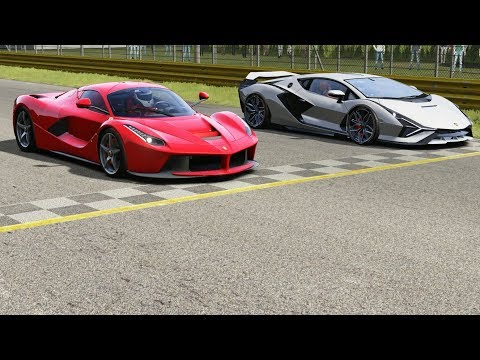

In [1]:
# 載入Youtube播放器
# 貼上Youtube影片網址的參數，寬度為500
# 顯示影片
# This is the video we're going to process
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("3cg8mhXPz2M", width=500)
display(video)

In [4]:
# 安裝Youtube下載器，卸載內建opencv，安裝python3-opencv
# 貼上影片網址，下載完後輸出成video.mp4
# 使用ffmpeg將影片剪輯為9秒，並複製為video-clip.mp4
# Install dependencies, download the video, and crop 5 seconds for processing
!pip install youtube-dl
!pip uninstall -y opencv-python-headless opencv-contrib-python
!apt install python3-opencv  # the one pre-installed have some issues
!youtube-dl https://www.youtube.com/watch?v=3cg8mhXPz2M -f 22 -o video.mp4
!ffmpeg -i video.mp4 -t 00:00:09 -c:v copy video-clip.mp4

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-opencv is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
[youtube] 3cg8mhXPz2M: Downloading webpage
[download] Destination: video.mp4
[download] 100% of 73.71MiB in 00:01
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libo

In [5]:
# 使用demo.py程式進行訓練，設定檔為panoptic_fpn_R_101_3x.yaml，訓練完輸出成video-output.mkv
# 設定權重模型
# Run frame-by-frame inference demo on this video (takes 3-4 minutes) with the "demo.py" tool we provided in the repo.
!git clone https://github.com/facebookresearch/detectron2
!python detectron2/demo/demo.py --config-file detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml --video-input video-clip.mp4 --confidence-threshold 0.6 --output video-output.mkv \
  --opts MODEL.WEIGHTS detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl

fatal: destination path 'detectron2' already exists and is not an empty directory.
Failed to load OpenCL runtime
[11/02 07:04:44 detectron2]: Arguments: Namespace(confidence_threshold=0.6, config_file='detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl'], output='video-output.mkv', video_input='video-clip.mp4', webcam=False)
[11/02 07:04:50 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl
[11/02 07:04:50 fvcore.common.file_io]: URL https://dl.fbaipublicfiles.com/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl cached in /root/.torch/fvcore_cache/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl
[11/02 07:04:50 fvcore.common.checkpoint]: Reading a file from '

In [ ]:
# 從colab下載video-output.mkv檔案
# Download the results
from google.colab import files
files.download('video-output.mkv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>